In [2]:
#!/usr/bin/env python
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.tri as tri
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
from matplotlib import ticker, cm
import numpy as np
from numpy import ma
import csv

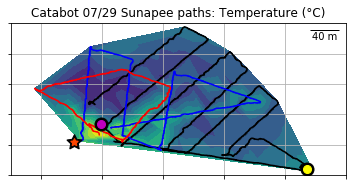

In [12]:
degree_sign= u'\N{DEGREE SIGN}'

CSV_FILE_PATH = '../../../Data/ISER2021/Sunapee-20200729-path-1.csv'
CSV_FILE_PATH2 = '../../../Data/ISER2021/Sunapee-20200729-path-2.csv'
CSV_FILE_PATH3 = '../../../Data/ISER2021/Sunapee-20200729-path-3.csv'

with open(CSV_FILE_PATH, 'r') as csv_file:
    reader = csv.reader(csv_file)
    path1_list = np.array(list(reader))
    
with open(CSV_FILE_PATH2, 'r') as csv_file:
    reader = csv.reader(csv_file)
    path2_list = np.array(list(reader))
    
with open(CSV_FILE_PATH3, 'r') as csv_file:
    reader = csv.reader(csv_file)
    path3_list = np.array(list(reader))

#=============================== 07/15 ===============================

# one independent
"""
z = path1_list[0:2127,23]
z = z.astype('float32')

# gps x,y
x = path1_list[0:2127,2]
x = x.astype('float32')
y = path1_list[0:2127,1]
y = y.astype('float32')
"""

# PATH 1
# temp
z1 = path1_list[0:2374,23]
z1 = z1.astype('float32')

# gps x,y
x1 = path1_list[0:2374,2]
x1 = x1.astype('float32')
y1 = path1_list[0:2374,1]
y1 = y1.astype('float32')

## PATH 2
# temp
z2 = path2_list[0:1089,23]
z2 = z2.astype('float32')

# gps x,y
x2 = path2_list[0:1089,2]
x2 = x2.astype('float32')
y2 = path2_list[0:1089,1]
y2 = y2.astype('float32')

## PATH 3
# temp
z3 = path3_list[0:675,23]
z3 = z3.astype('float32')

# gps x,y
x3 = path3_list[0:675,2]
x3 = x3.astype('float32')
y3 = path3_list[0:675,1]
y3 = y3.astype('float32')

x = np.concatenate([x1, x2, x3])
y = np.concatenate([y1, y2, y3])
z = np.concatenate([z1, z2, z3])

#=====================================================================

f, ax = plt.subplots()
#ax.set_title('Catabot 07/15 Sunapee path 1: Temperature (' + degree_sign + 'C)')
ax.set_title('Catabot 07/29 Sunapee paths: Temperature (' + degree_sign + 'C)')

cs = ax.tricontourf(x,y,z, 10, norm=colors.SymLogNorm(linthresh=0.03, linscale=0.03))
#cs = ax.tricontourf(x,y,z, 20, vmin=24.35, vmax=26.94)

#f.colorbar(cs, orientation='horizontal', format='%.1f')

#ax.set_xlabel('Longitude')
plt.xlim([-72.038, -72.0325])
ax.set_xticks(np.arange(-72.0375, -72.0324, 0.001))
f.canvas.draw()
ax.set_xticklabels(['-72.0375', '-72.0365', '-72.0355', '-72.0345', '-72.0335', '-72.0325'])

#ax.set_ylabel('Latitude')
plt.ylim([43.4095, 43.4120])
ax.set_yticks(np.arange(43.4095, 43.4121, 0.0005))
f.canvas.draw()
ax.set_yticklabels(['43.4100', '43.4105', '43.4110', '43.4115', '43.4120', '43.4125'])

# remove the tick
frame = plt.gca()
frame.axes.xaxis.set_ticklabels([])
frame.axes.yaxis.set_ticklabels([])


# path 1,2,3
ax.plot(x1,y1,marker='o', color='k', markersize=0.1)
ax.plot(x2,y2,marker='o', color='b', markersize=0.1)
ax.plot(x3,y3,marker='o', color='r', markersize=0.1)

ax.set_aspect('equal')
plt.grid(True)

# summer buoy
ax.plot(np.array([-72.033128]), np.array([43.4096079]), color='k', marker='o', markersize=13)
ax.plot(np.array([-72.033128]), np.array([43.4096079]), color='yellow', marker='o', markersize=8)

# boathouse
ax.plot(np.array([-72.0369625]), np.array([43.4100466]), color='k', marker=(5,1), markersize=16)
ax.plot(np.array([-72.0369625]), np.array([43.4100466]), color='#FF4500', marker=(5,1), markersize=8)

# winter buoy
ax.plot(np.array([-72.0365116]), np.array([43.410345]), color='k', marker='o', markersize=13)
ax.plot(np.array([-72.0365116]), np.array([43.410345]), color='m', marker='o', markersize=8)

bar = AnchoredSizeBar(ax.transData, 0.00046, '40 m', 'upper right', pad=0.6, frameon=False)
ax.add_artist(bar)


plt.show()
f.savefig('0729-path-combined.pdf', bbox_inches ='tight')